EXTRACCION DE DATOS

nos ayudara a clasificar  los paises donde son factibles   establecer la venta del producto o no 

In [154]:
import requests
from pandas import json_normalize
r = requests.get('http://esperanzadevida.herokuapp.com/api4')
x = r.json()
df = json_normalize(x['api4']) 
df=df.drop(['index'], axis=1)
df.head()

,pais,continentes,country,year,Desempleo_mujeres,Desempleo_mujeres_jóvenes_14_24_años,Desempleo_varones_jovenes_15_24_años,Desempleo_Población_activa_total,esperanza_vida_nacer_Mujeres,esperanza_vida_nacer_Varones,...,tasa_mort_5anios_cada_mil,crecimiento_poblacion,Tasa_fertilidad_mujeres,PBI_per_capita,desempleo_total,mortalidad_accidentes_transito,acceso_a_la_electricidad,Inscripción_escolar_nivel_primario,Inscripción_escolar_nivel_secundaria,inscripciones_nivel_terciario
0,Zimbabwe,Africa,19,2020,8.774,18.101999,18.070999,13415460.0,64.383,58.744,...,71.5,3.218530,142.8220,1631.431691,8.333,26.1,312.228895,103.607564,88.625146,3.249986
1,Zimbabwe,Africa,19,2019,7.835,16.665001,16.554001,13116712.0,64.039,58.416,...,74.2,3.242914,145.3900,2177.799015,7.421,26.1,312.228895,103.607564,88.625146,3.249986
2,Zimbabwe,Africa,19,2018,7.829,16.693001,16.613001,12659938.0,63.666,58.064,...,77.3,3.276145,147.9580,2524.942483,7.421,26.0,312.228895,103.607564,88.625146,3.249986
3,Zimbabwe,Africa,19,2017,7.810,16.695000,16.646999,12223456.0,63.252,57.677,...,80.6,3.322158,150.5260,2313.220584,7.408,25.5,312.228895,103.607564,88.625146,3.249986
4,Zimbabwe,Africa,19,2016,7.807,16.726000,16.716999,11804734.0,62.783,57.242,...,84.1,3.378269,153.9008,1728.023754,7.412,24.7,312.228895,103.607564,50.671478,9.336260


COLUMNAS

In [155]:
df.columns

Index(['pais', 'continentes', 'country', 'year', 'Desempleo_mujeres',
       'Desempleo_mujeres_jóvenes_14_24_años',
       'Desempleo_varones_jovenes_15_24_años',
       'Desempleo_Población_activa_total', 'esperanza_vida_nacer_Mujeres',
       'esperanza_vida_nacer_Varones', 'esperanza_vida_nacer_total',
       'poblacion_total_salud', 'fertilidad_mujeres', 'tasa_mortalidad_bebes',
       'crecimiento_masa_monetaria_inflacion', 'tasa_mort_5anios_cada_mil',
       'crecimiento_poblacion', 'Tasa_fertilidad_mujeres', 'PBI_per_capita',
       'desempleo_total', 'mortalidad_accidentes_transito',
       'acceso_a_la_electricidad', 'Inscripción_escolar_nivel_primario',
       'Inscripción_escolar_nivel_secundaria',
       'inscripciones_nivel_terciario'],
      dtype='object')

DATOS

In [156]:
test_date = df[df.pais.isin(["Chile","Japan","Finland","Canada","Nigeria"])]
train_date = df[~df.pais.isin(["Chile","Japan","Finland","Canada","Nigeria"])]

CONVERSION

target = esperanza (0 y 1)

In [157]:
def anios(dato):
    if dato > 70:
        return 1
    else:
        return 0
train_date['esperanza'] = train_date['esperanza_vida_nacer_total'].apply(anios)
lista =["year","country",'esperanza',"Desempleo_Población_activa_total","poblacion_total_salud","crecimiento_poblacion","PBI_per_capita","desempleo_total"]
datos= train_date[lista]
datos

C:\Users\User\AppData\Local\Temp\ipykernel_428\139258773.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_date['esperanza'] = train_date['esperanza_vida_nacer_total'].apply(anios)


,year,country,esperanza,Desempleo_Población_activa_total,poblacion_total_salud,crecimiento_poblacion,PBI_per_capita,desempleo_total
0,2020,19,0,13415460.0,32866268.0,3.218530,1631.431691,8.333
1,2019,19,0,13116712.0,31825299.0,3.242914,2177.799015,7.421
2,2018,19,0,12659938.0,30809787.0,3.276145,2524.942483,7.421
3,2017,19,0,12223456.0,29816769.0,3.322158,2313.220584,7.408
4,2016,19,0,11804734.0,28842482.0,3.378269,1728.023754,7.412
...,...,...,...,...,...,...,...,...
925,1994,18,0,5232727.0,11261752.0,1.511821,611.865276,4.960
926,1993,18,0,5110439.0,11092775.0,1.748433,591.719682,4.974
927,1992,18,0,4980977.0,10900511.0,2.034246,619.372083,4.993
928,1991,18,0,4850329.0,10681008.0,2.355000,809.051140,4.941


In [158]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 929
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              775 non-null    int64  
 1   country                           775 non-null    int64  
 2   esperanza                         775 non-null    int64  
 3   Desempleo_Población_activa_total  775 non-null    float64
 4   poblacion_total_salud             775 non-null    float64
 5   crecimiento_poblacion             775 non-null    float64
 6   PBI_per_capita                    775 non-null    float64
 7   desempleo_total                   775 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 54.5 KB


mujeres

MinMaxScaler

In [159]:
from  sklearn  import  preprocessing
import pandas as pd

minmax =  preprocessing.MinMaxScaler().fit_transform(datos)
data_min= pd.DataFrame(minmax)
data_min=data_min.set_axis(lista, axis=1)
data_min

,year,country,esperanza,Desempleo_Población_activa_total,poblacion_total_salud,crecimiento_poblacion,PBI_per_capita,desempleo_total
0,1.000000,0.678571,0.0,0.015148,0.021134,0.886872,0.012964,0.201887
1,0.966667,0.678571,0.0,0.014774,0.020395,0.889661,0.018289,0.172721
2,0.933333,0.678571,0.0,0.014202,0.019674,0.893463,0.021672,0.172721
3,0.900000,0.678571,0.0,0.013656,0.018968,0.898727,0.019608,0.172306
4,0.866667,0.678571,0.0,0.013131,0.018276,0.905147,0.013905,0.172434
...,...,...,...,...,...,...,...,...
770,0.133333,0.642857,0.0,0.004903,0.005790,0.691613,0.003028,0.094020
771,0.100000,0.642857,0.0,0.004750,0.005670,0.718683,0.002832,0.094468
772,0.066667,0.642857,0.0,0.004588,0.005533,0.751382,0.003101,0.095075
773,0.033333,0.642857,0.0,0.004424,0.005377,0.788078,0.004950,0.093412


correlaciones 

In [160]:
from funpymodeling.exploratory import corr_pair
res=corr_pair(data_min)
res.head()

,v1,v2,R,R2
1,country,year,1.394854e-17,1.945618e-34
2,esperanza,year,1.781766e-01,3.174690e-02
3,Desempleo_Población_activa_total,year,3.843944e-02,1.477591e-03
4,poblacion_total_salud,year,4.077611e-02,1.662691e-03
5,crecimiento_poblacion,year,-1.633482e-01,2.668263e-02


correlaciones con nuestro datoa predecir esperaza

In [161]:
res_target_ordered=res[res['v2']=="esperanza"].sort_values('R2', ascending=False)
res_target_ordered

,v1,v2,R,R2
22,PBI_per_capita,esperanza,0.492926,0.242977
21,crecimiento_poblacion,esperanza,-0.408823,0.167136
16,year,esperanza,0.178177,0.031747
20,poblacion_total_salud,esperanza,-0.131805,0.017372
17,country,esperanza,0.081548,0.006650
23,desempleo_total,esperanza,-0.078119,0.006103
19,Desempleo_Población_activa_total,esperanza,-0.065803,0.004330


In [162]:
res_target_ordered[res_target_ordered['R2']<0.05]['v1']
res_target_ordered

,v1,v2,R,R2
22,PBI_per_capita,esperanza,0.492926,0.242977
21,crecimiento_poblacion,esperanza,-0.408823,0.167136
16,year,esperanza,0.178177,0.031747
20,poblacion_total_salud,esperanza,-0.131805,0.017372
17,country,esperanza,0.081548,0.006650
23,desempleo_total,esperanza,-0.078119,0.006103
19,Desempleo_Población_activa_total,esperanza,-0.065803,0.004330


graficamente

<AxesSubplot:>

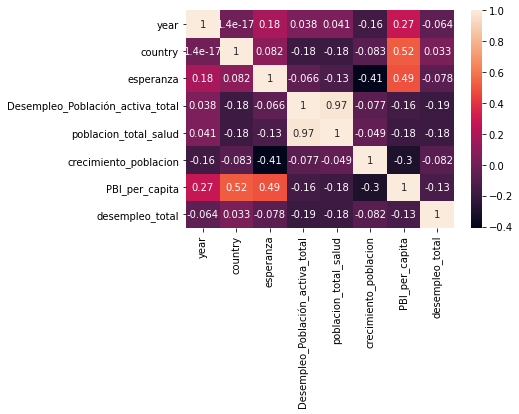

In [163]:
import seaborn as sns

correlacion = data_min.corr()
sns.heatmap(correlacion, annot=True)

DIVIDMOS LOS DATOS 

In [165]:
from sklearn.model_selection import train_test_split # usaremos para separar los datos de  train y test


feature_cols = ["crecimiento_poblacion","PBI_per_capita","desempleo_total"]#filtramos nuestras columnas que nso ayudaran a entrenar el modelo 
x = data_min[feature_cols]
y = data_min.esperanza
# ahora dividiremos nuestros datos para el train y test 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

BALANCEMOS LOS DATOS 

In [166]:
from  sklearn.preprocessing import  StandardScaler
sc =  StandardScaler()
X_train_res =sc.fit_transform(X_train)
X_test= sc.transform(X_test)

REGRESION LOGISTICA

In [167]:
from sklearn.linear_model import LogisticRegression # improtamos el modelo logistico 
from sklearn.metrics import confusion_matrix, classification_report  #nos ayudara a mostrar la matrix de confusion 

#entrenamos nuestro modelo  logistico
modelo_logistico = LogisticRegression() #
modelo_logistico.fit(X_train_res, y_train) #entrenamos 
predictions = modelo_logistico.predict(X_test) # predecimos 

print(classification_report(y_test, predictions)) #
cm=confusion_matrix(y_test,predictions)#mostramos la matris de confucion para ver cuantos datos estna prediciendo  0 y 1
print(cm)

from sklearn.metrics import recall_score
print('El score del modelo es:', recall_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.70      0.94      0.80        64
         1.0       0.97      0.85      0.91       169

    accuracy                           0.87       233
   macro avg       0.84      0.89      0.85       233
weighted avg       0.90      0.87      0.88       233

[[ 60   4]
 [ 26 143]]
El score del modelo es: 0.8461538461538461


DATOS  predecidos

In [168]:
predictions

array([0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0.

In [169]:
modelo_logistico.coef_ #estos son los parametros quemejor ajustan al modelo 

array([[-0.41309901,  5.53987421, -0.38260456]])

In [170]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

recall = TP / float(TP + FN)

print('Recall  : {0:0.4f}'.format(recall))

Recall  : 0.6977


PREDECIMOS NUESTROS FUTUROS PAISES 

In [171]:
data_test= test_date[feature_cols]
from  sklearn.preprocessing import  StandardScaler # rescalamos neustros datos de test
sc =  StandardScaler()
data_test =sc.fit_transform(data_test)

predictions_test = modelo_logistico.predict(data_test) #predecimos con el modelo 
print (predictions_test)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


PREDICCION CON NIGERIA

In [172]:

lista2 =["year","pais","country","esperanza_vida_nacer_Mujeres",]
datos= test_date[lista2]
datos["predict_esperanza"]= predictions_test
datos_esp = datos[datos['pais'] =="Nigeria"]
Total = datos_esp['predict_esperanza'].sum()
if Total == 0 :
    print("no se recomienda  la venta de este producto en este pais ")
else:
    print("si se recomienda  la venta de este producto en este pais ")

no se recomienda  la venta de este producto en este pais 


C:\Users\User\AppData\Local\Temp\ipykernel_428\2596365393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["predict_esperanza"]= predictions_test


PREDICCION CON  Japon

In [173]:


datos_esp = datos[datos['pais'] =="Finland"]
datos_esp[["pais","predict_esperanza"]]
Total = datos_esp['predict_esperanza'].sum()

if Total == 0 :
    print("no se recomienda  la venta de este producto en este pais ")
else:
    print("si se recomienda  la venta de este producto en este pais ")

si se recomienda  la venta de este producto en este pais 


In [174]:
#